---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [1]:
import pandas as pd
import numpy as np
from functools import reduce

file_1 = "Energy Indicators.xls"
file_2 = "world_bank.csv"
file_3 = "scimagojr-3.xlsx"


def energy():
    energy = pd.read_excel(file_1, skiprows=17, usecols=[2, 3, 4, 5], skipfooter=38)
    for col in energy.columns:
        if col[:] == 'Unnamed: 2':
            energy.rename(columns={col:'Country'}, inplace=True)
        if col[:] == 'Petajoules':
            energy.rename(columns={col:'Energy Supply'}, inplace=True)
        if col[:] == 'Gigajoules':
            energy.rename(columns={col:'Energy Supply per Capita'}, inplace=True)
        if col[:] == '%':
            energy.rename(columns={col:'% Renewable'}, inplace=True)
    energy["Energy Supply"] *= 10**6  # convert to Giga-Joules
    mask_dots = energy["Energy Supply"].str.contains("...") | energy["Energy Supply"].isnull()
    energy.loc[mask_dots, "Energy Supply"] = np.NaN
    # remove parentheses and numbers
    energy.Country = energy.Country.str.replace(r"\d","").str.replace(r"\s+\(.*\)","")
    bad_names = ["Republic of Korea",
                 "United States of America",
                 "United Kingdom of Great Britain and Northern Ireland",
                 "China, Hong Kong Special Administrative Region"]
    good_names = ["South Korea", "United States", "United Kingdom", "Hong Kong"]
    energy = energy.replace(bad_names, good_names)
    energy["Energy Supply per Capita"] = energy["Energy Supply per Capita"].apply(pd.to_numeric, errors='coerce')
    return energy


def GDP():
    GDP = pd.read_csv(file_2, skiprows=4)
    bad_names_GDP = ["Korea, Rep.", "Iran, Islamic Rep.", "Hong Kong SAR, China"]
    good_names_GDP = ["South Korea", "Iran", "Hong Kong"]
    GDP = GDP.replace(bad_names_GDP, good_names_GDP)
    for col in GDP.columns:
        if col[:] == 'Country Name':
            GDP.rename(columns={col:'Country'}, inplace=True)
    return GDP


energy = energy()
GDP = GDP()
ScimEn = pd.read_excel(file_3)

dfs = [GDP, energy, ScimEn]
# df_final = reduce(lambda left, right: pd.merge(left, right, on='Country'), dfs)
df_final_outer = dfs[0].merge(dfs[1], how="outer", on='Country').merge(dfs[2], how="outer", on='Country')
df_final_inner = dfs[0].merge(dfs[1], how="inner", on='Country').merge(dfs[2], how="inner", on='Country')
# bad_cols = [str(i) for i in range(1960, 2006)]
# df_final = df_final.drop(bad_cols, axis=1)


def answer_one():
    dfs = [GDP, energy, ScimEn]
    df_final = dfs[0].merge(dfs[1], how="inner", on='Country').merge(dfs[2], how="inner", on='Country')
    bad_cols = [str(i) for i in range(1960, 2006)]
    df_final = df_final.drop(bad_cols, axis=1)
    
    # Use only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).   
    df_final = df_final[df_final['Rank'].isin(range(1, 16))]
  
    df_final.set_index("Country", inplace=True)
    df_final = df_final.drop(["Country Code", "Indicator Name", "Indicator Code"], axis=1)
    return df_final


answer_one()


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Energy Supply,Energy Supply per Capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,
Australia,1.021939e+12,1.060340e+12,1.099644e+12,1.119654e+12,1.142251e+12,1.169431e+12,1.211913e+12,1.241484e+12,1.272520e+12,1.301251e+12,5.386000e+09,231.0,11.810810,14,8831,8725,90765,15606,10.28,107
Brazil,1.845080e+12,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,1.214900e+10,59.0,69.648030,15,8668,8596,60702,14396,7.00,86
Canada,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,1.043100e+10,296.0,61.945430,6,17899,17620,215003,40930,12.01,149
China,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.271910e+11,93.0,19.754910,1,127050,126767,597237,411683,4.70,138
Germany,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,1.326100e+10,165.0,17.901530,7,17027,16831,140566,27426,8.26,126
Spain,1.414823e+12,1.468146e+12,1.484530e+12,1.431475e+12,1.431673e+12,1.417355e+12,1.380216e+12,1.357139e+12,1.375605e+12,1.419821e+12,4.923000e+09,106.0,37.968590,12,9428,9330,123336,23964,13.08,115
France,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,1.059700e+10,166.0,17.020280,9,13153,12973,130632,28601,9.93,114
United Kingdom,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,7.920000e+09,124.0,10.600470,4,20944,20357,206091,37874,9.84,139
India,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,3.319500e+10,26.0,14.969080,8,15005,14841,128763,37209,8.58,115


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [2]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [2]:
def answer_two():
    return len(df_final_outer) - len(df_final_inner)

answer_two()


156

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [3]:
Top15 = answer_one()
Top15_final = Top15[["2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015"]]


def answer_three():
    avgGDP = Top15_final.mean(axis=1)
    return avgGDP


answer_three()

Country
Australia             1.164043e+12
Brazil                2.189794e+12
Canada                1.660647e+12
China                 6.348609e+12
Germany               3.493025e+12
Spain                 1.418078e+12
France                2.681725e+12
United Kingdom        2.487907e+12
India                 1.769297e+12
Iran                  4.441558e+11
Italy                 2.120175e+12
Japan                 5.542208e+12
South Korea           1.106715e+12
Russian Federation    1.565459e+12
United States         1.536434e+13
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [4]:
avgGDP = answer_three()


def answer_four():
    sixth_largest = avgGDP.nlargest(6, keep='last').tail(1).index[0]  # 'United Kingdom'
    GDPs = Top15_final.loc[sixth_largest]
    return GDPs[-1] - GDPs[0]


answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [5]:
def answer_five():
    Top15 = answer_one()
    df = Top15["Energy Supply per Capita"]
    return df.mean()


answer_five()

157.59999999999999

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [6]:
def answer_six():
    Top15 = answer_one()
    df = Top15["% Renewable"]
    country = df.idxmax(axis=1)
    return (country, df.max())


answer_six()

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [7]:
def answer_seven():
    Top15 = answer_one()
    
    Top15["Ratio"] = Top15["Self-citations"] / Top15["Citations"]
    
    maximum = Top15["Ratio"].max()
    country = Top15["Ratio"].idxmax(axis=1)
    
    return (country, maximum) # Top15


answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [8]:
def answer_eight():
    Top15 = answer_one()
    Top15["pop_estimate"] = Top15["Energy Supply"] / Top15["Energy Supply per Capita"]
    maximum_3rd = Top15["pop_estimate"].nlargest(3).tail(1).index[0]
    return maximum_3rd


answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [9]:
def answer_nine():
    Top15 = answer_one()

    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    
    return Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])


answer_nine()

0.79400104354429479

In [ ]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [ ]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [10]:
def answer_ten():
    # Top15 = answer_one()
    median = np.median(Top15['% Renewable'])

    # initialize new column
    Top15["HighRenew"] = 1

    mask_over = (Top15["% Renewable"] >= median)
    # mask_under = (Top15["% Renewable"] < median)
    # Top15[mask_over]["HighRenew"] = 1
    # Top15[mask_under]["HighRenew"] = 0
    # Top15[mask_over]["HighRenew"] = Top15[mask_over]["HighRenew"].replace(0, 5)

    Top15["HighRenew"] = Top15["HighRenew"].where(mask_over, other=0)

    HighRenew = Top15.groupby('Rank').apply(lambda d: d.sort()).reset_index('Rank', drop=True)
    
    HighRenew = HighRenew["HighRenew"]
    
    return HighRenew


answer_ten()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(....) is deprecated, use sort_index(.....)


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [22]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']

# Top15 = Top15.set_index([k, v for k, v in ContinentDict.items()])

# df = pd.DataFrame.from_dict(ContinentDict)
# df = pd.DataFrame()
# df = df.set_index(["Australia", "Asia", "North America", "Europe", "South America"])

def answer_eleven():
    # Top15 = answer_one()
    
    df_grouped = Top15.groupby(ContinentDict)
    # df_grouped = Top15.groupby(ContinentDict).agg(('PopEst': np.sum))
    # df_grouped['Columns'] = map(df_grouped.index, ContinentDict)
    # df_grouped = df_grouped.set_index[ContinentDict.keys()]
    
    df = pd.DataFrame(["size", "sum", "mean", "std"])
    
    for group, frame in df_grouped:

        # print("Continent: ", group)
        # print(frame)
        size = len(frame)
        Sum = np.sum(frame["PopEst"])
        mean = np.mean(frame["PopEst"])
        std = np.std(frame["PopEst"])

        df = pd.concat(df, [size, Sum, mean, std])
        
        # print("Size: ", size, "Sum: ", Sum, "mean ", mean, "std: ", std)
    
    return df # df_grouped # Top15


answer_eleven()

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [ ]:
def answer_twelve():
    Top15 = answer_one()
    return "ANSWER"

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [ ]:
def answer_thirteen():
    Top15 = answer_one()
    return "ANSWER"

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [12]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


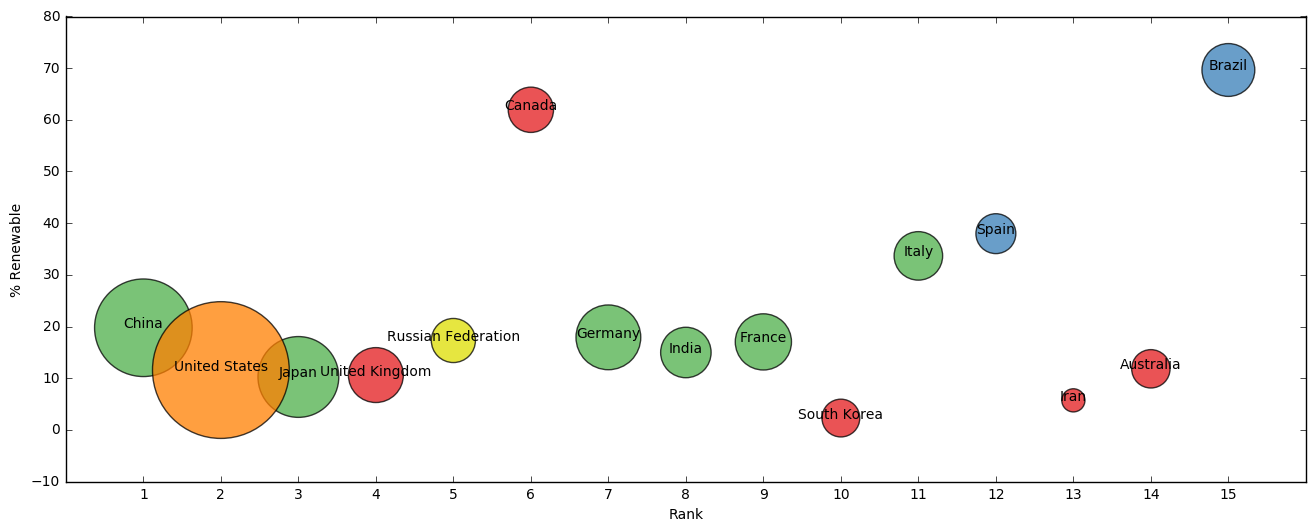

In [13]:
# plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!